In [103]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-89p8khu9
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-89p8khu9
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-xmq7yc2q/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [84]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
from classification_models.resnet import ResNet18

mmodel = ResNet18((224, 224, 3), weights='imagenet')

46981120/46977688 [==============================] - 0s 0us/step


In [0]:
import keras
from keras.layers import Activation, GlobalAveragePooling2D, Conv2D
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
conv2d_17 = Conv2D(10, (1,1))(base_model.output)
x = GlobalAveragePooling2D(name='GAP')(conv2d_17)
output = Activation('softmax')(x)
mmodel = keras.models.Model(inputs=[base_model.input], outputs=[output])

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
from keras.datasets import cifar10
import numpy as np
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_classes = len(np.unique(train_labels))

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [0]:
(_, _), (_, test_class_labels) = cifar10.load_data()

In [0]:
from keras.utils import np_utils
# train_features = train_features.astype('float32')/255
# test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
def plot_model_history(model_history):
  
  fig, axs = plt.subplots(1,2,figsize=(15,5))
  # summarize history for accuracy
  axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
  axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
  axs[0].set_title('Model Accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
  axs[0].legend(['train', 'val'], loc='best')
  # summarize history for loss
  axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
  axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
  axs[1].set_title('Model Loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
  axs[1].legend(['train', 'val'], loc='best')
  plt.show()

In [0]:
def accuracy(test_x, test_y, model):
  
  result = model.predict(test_x)
  predicted_class = np.argmax(result, axis=1)
  true_class = np.argmax(test_y, axis=1)
  num_correct = np.sum(predicted_class == true_class) 
  accuracy = float(num_correct)/result.shape[0]
  return (accuracy * 100)

#### Trained on Cifar10

In [0]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/My Drive/resnet18-cifar10-pretrained-imagenet-without-scaling.h5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks=[checkpointer] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=10)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
390/390 [==============================] - 23s 60ms/step - loss: 0.8234 - acc: 0.7176 - val_loss: 0.6619 - val_acc: 0.7770

Epoch 00001: val_acc improved from -inf to 0.77700, saving model to /content/drive/My Drive/resnet18-cifar10-pretrained-imagenet-without-scaling.h5
Epoch 2/10
390/390 [==============================] - 20s 50ms/step - loss: 0.5001 - acc: 0.8274 - val_loss: 0.7168 - val_acc: 0.7612

Epoch 00002: val_acc did not improve from 0.77700
Epoch 3/10
390/390 [==============================] - 19s 48ms/step - loss: 0.3856 - acc: 0.8679 - val_loss: 0.7031 - val_acc: 0.7801

Epoch 00003: val_acc improved from 0.77700 to 0.78010, saving model to /content/drive/My Drive/resnet18-cifar10-pretrained-imagenet-without-scaling.h5
Epoch 4/10
390/390 [==============================] - 19s 48ms/step - loss: 0.2888 - acc: 0.9008 - val_loss: 0.6641 - val_acc: 0.7994

Epoch 00004: val_acc improved from 0.78010 to 0.79940, saving model to /content/drive/My Drive/resnet18-cifar10

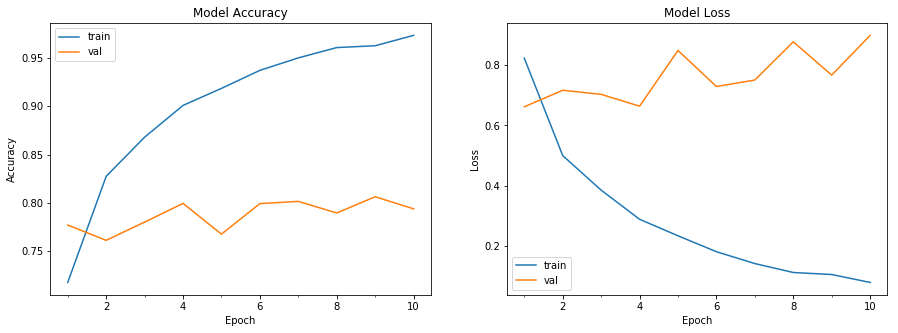

Accuracy on test data is: 79.38


In [42]:
from keras.preprocessing.image import ImageDataGenerator
import time
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=callbacks)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#### Load the weights

In [88]:
import tensorflow as tf
from keras.models import load_model
model = load_model("/content/drive/My Drive/resnet18-cifar10-pretrained-imagenet-without-scaling.h5", custom_objects={'tf': tf})

W0714 09:25:24.988493 139691599275904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 09:25:25.074854 139691599275904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 09:25:25.076327 139691599275904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0714 09:25:25.078344 139691599275904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0714 09:25:25.080076 139691

In [38]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, None, None, 3 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_55 (ZeroPadding2 (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d_55[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
preds = model.predict(test_features)

In [0]:
preds_index = np.argmax(preds,axis=1)

In [0]:
preds_index = preds_index.tolist()
# to convert 2-d array to list 
test_class_labels = test_class_labels.ravel()

In [0]:
# index
correct_index, misclassified_index = [],[]
for i in range(len(test_class_labels)):
  if preds_index[i] == test_class_labels[i]:
    correct_index.append(i)
  else:
    misclassified_index.append(i)

In [93]:
len(correct_index), len(misclassified_index)

(8063, 1937)

In [44]:
import pandas as pd
pd.Series(preds_index).value_counts().sort_index()

0    1043
1     978
2    1320
3     996
4     932
5     878
6     950
7     985
8     861
9    1057
dtype: int64

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

#### Heatmap on Misclassified Images

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


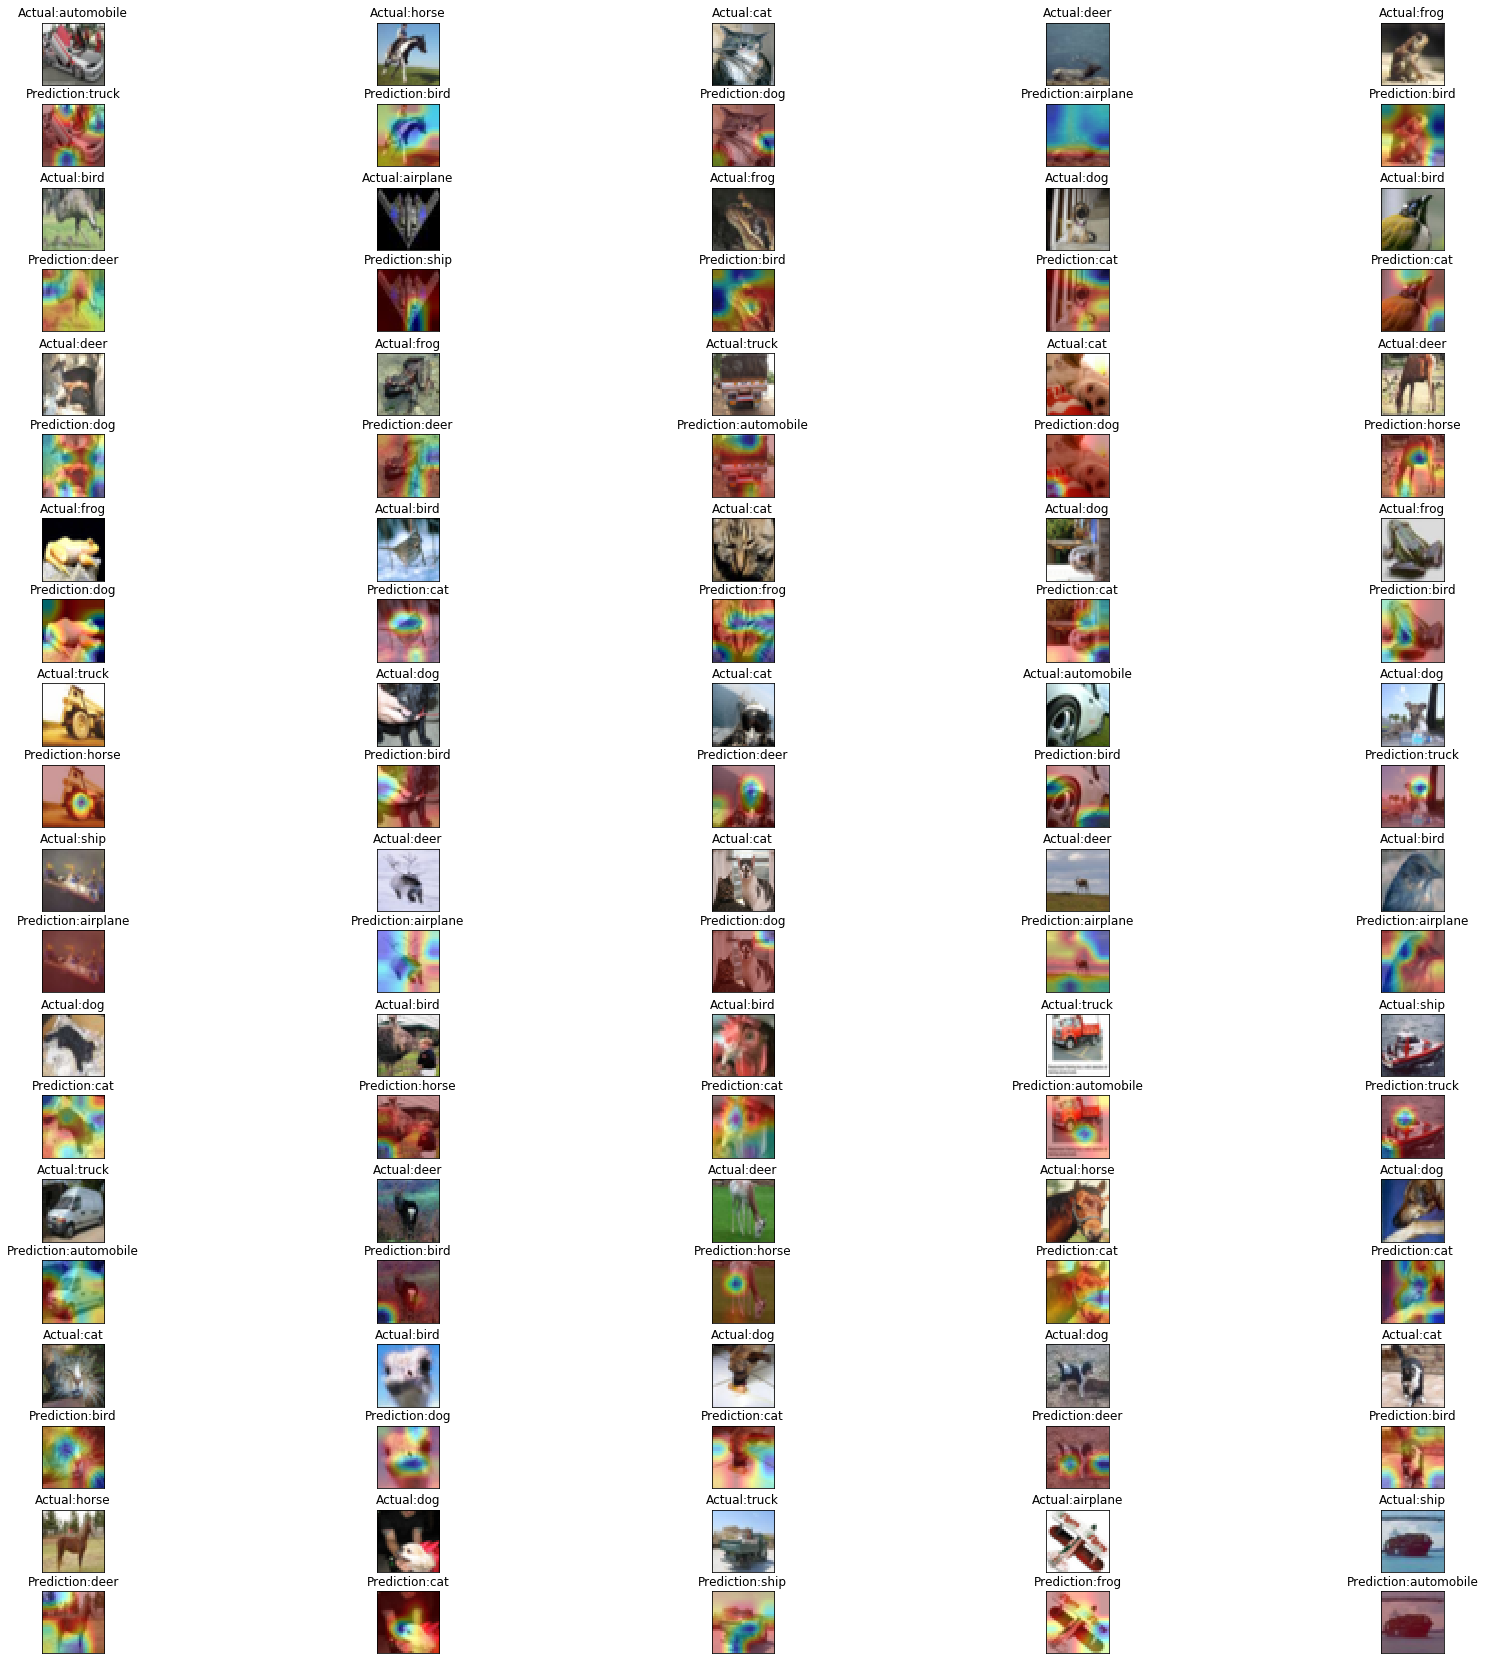

In [119]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(30, 30))
for index, value in enumerate(np.random.choice(misclassified_index, size = 50)):
  
  img = test_features[value]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("stage2_unit1_conv1")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for k in range(128):
    conv_layer_output_value[:, :, k] *= pooled_grads_value[k]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  imgs=[img, superimposed_img]
  outer = gridspec.GridSpec(10, 5, wspace=0.0, hspace=0.15)
  inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                  subplot_spec=outer[index], wspace=0.0, hspace=0.30)
  titles=['Actual:'+class_names[np.argmax(test_labels[value])], 'Prediction:'+class_names[class_idx]]
  for j in range(2):
      ax = plt.Subplot(fig, inner[j])
      ax.imshow(imgs[j])
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_title(titles[j])
      fig.add_subplot(ax)
  
fig.show()